In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score

formato ='{:,.2f}'.format
pd.set_option('display.max_columns',None)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

El presente informe de preprocesamiento incluye los pasos realizados con el fin de gestionar la limpieza para un conjunto de datos experimentales obtenidos del análisis de dos baterías en una bicicleta de motor eléctrico, sometida a diferentes pruebas de campo.

Mediante una exploración previa se determinó los tipos de datos contenidos en las columnas. Este paso facilita el uso posterior de esta información.

# Importación

In [2]:
tipos_datos = {
'tiempo':int
,'fecha_exp':str
,'fecha':str
,'exp':str
,'motor':str
,'bateria':str
,'peso_cond':float
,'lugar':str
,'duracion':str
,'distancia':str #aqui hay lab
,'vel_max':str #aqui hay lab
,'vel_prom':str #aqui hay lab
,'ACCELERATION_X':float
,'ACCELERATION_Y':float
,'ACCELERATION_Z':float
,'CURRENT_A_CALC':float
,'CURRENT_B_CALC':float
,'CURRENT_C_CALC':float
,'CURRENT_D_CALC':float
,'POWER_A':float
,'POWER_B':float
,'POWER_C':float
,'POWER_D':float
,'TEMPERATURE_A':float
,'TEMPERATURE_B':float
,'TEMPERATURE_C':float
,'TEMPERATURE_D':float
,'VOLTAGE_A':float
,'VOLTAGE_B':float
,'VOLTAGE_C':float
,'VOLTAGE_D':float
,'ENV_HUMIDITY':float
,'ENV_TEMPERATURE':float
}

In [3]:
ruta_daniel = '/content/drive/MyDrive/Especializacion/Monografia/B01_analisis.csv'
# ruta_local = 'G:/Mi unidad/Especializacion/Monografia/B01_analisis.csv'

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# df = pd.read_csv(ruta_local,sep=';',dtype=tipos_datos)
df = pd.read_csv(ruta_daniel,sep=';',dtype=tipos_datos)
df = df.drop('Unnamed: 0',axis=1)

Se excluye una columna que no contiene información.

Manualmente se eligen las columnas numéricas, generando un listado que podrá ser usado y consultado posteriormente.

In [7]:
numericas = [
'peso_cond'
#,'lugar'
#, 'duracion'
#, 'distancia'
#, 'vel_max'
#, 'vel_prom'
, 'ACCELERATION_X'
, 'ACCELERATION_Y'
, 'ACCELERATION_Z'
, 'CURRENT_A_CALC'
,'CURRENT_B_CALC'
, 'CURRENT_C_CALC'
, 'CURRENT_D_CALC'
, 'POWER_A'
, 'POWER_B'
, 'POWER_C'
, 'POWER_D'
, 'TEMPERATURE_A'
, 'TEMPERATURE_B'
,'TEMPERATURE_C'
, 'TEMPERATURE_D'
, 'VOLTAGE_A'
, 'VOLTAGE_B'
, 'VOLTAGE_C'
,'VOLTAGE_D'
, 'ENV_HUMIDITY'
, 'ENV_TEMPERATURE'
]

Antes de iniciar el proceso de limpieza se realizó una exploración del dataset para encontrar patrones relevantes en los datos, inconsistencias, comportamientos atípicos y otros aspectos que puedieran servir como guía para el paso a paso del desarrollo.

También se analizaron las posibles distribuciones estadísticas presentadas por las diferentes variables con el fin de analizar la posibilidad de usar sus estadísticos en caso de requerirse un proceso de imputación. Lastimosamente, no se encontró adecuada ninguna de las distribuciones probadas.

In [ ]:
# from scipy import stats
# from scipy.stats import (
#     norm, beta, expon, gamma,logistic, lognorm, triang, uniform, dweibull,
#     dgamma, gumbel_r, weibull_max, weibull_min,t
#     )

# distributions = [
#     norm, beta, expon, gamma,logistic, lognorm, triang, uniform, dweibull,
#     dgamma, gumbel_r, weibull_max, weibull_min,t
#     ]

# ksN = 100 # Kolmogorov-Smirnov KS test for goodness of fit: samples
# ALPHA = 0.05 # significance level for hypothesis test

# def fun_kstest(data, distname, paramtup):
#     ksP = stats.kstest(data, distname, paramtup, N=ksN)[1] # return p-value
#     KsS = stats.kstest(data, distname, paramtup, N=ksN)[0] # return statistic

#     return (ksP,KsS) # return p-value

# def fun_fitdist(data, dist):
#     # fitted = dist.fit(data, floc=0.0)
#     fitted = dist.fit(data)
#     ksP,KsS = fun_kstest(data, dist.name, fitted)
#     res = (dist.name, ksP, KsS, *fitted)
#     return res

# def obtener_distribuciones(columna):
#   # call fitting function for all distributions in list
#   res = [fun_fitdist(columna,D) for D in distributions]
#   # res = [fitdist(normales,D) for D in distributions]
#   # convert the fitted list of tuples to dataframe
#   pd.options.display.float_format = '{:,.3f}'.format
#   df_distribuciones = pd.DataFrame(res, columns=["distribution", "KS p-value","KS Statistic", "param1", "param2", "param3", "param4", ])
#   df_distribuciones["distobj"] = distributions
#   df_distribuciones.sort_values(by=["KS p-value"], inplace=True, ascending=False)
#   df_distribuciones.reset_index(inplace=True)
#   df_distribuciones.drop("index", axis=1, inplace=True)
#   df_distribuciones['Rechazo Ho'] = np.where(df_distribuciones['KS p-value']<=ALPHA,'Rechazo','No rechazo')
#   df_distribuciones = df_distribuciones[["distribution", "KS p-value","Rechazo Ho", "KS Statistic", "param1", "param2", "param3", "param4"]]
#   return df_distribuciones

# Limpieza

In [ ]:
df['fecha_exp'].value_counts()

fecha_exp
20220911-E01        2620
20220923-E02        2604
20220921-E02        2532
20220930-E01        2477
20220924-E02        2148
                    ... 
20220921-E01         458
20220918_E_2_B01     169
20221024_E_2_B01     108
20220920_E_1_B01      52
20221025_E_1_B01      20
Name: count, Length: 65, dtype: int64

El conjunto de datos registra segundo a segundo el comportamiento de las variables recolectadas por los sensores e instrumentos durante 65 ciclos de batería. Cada ciclo presenta sus peculiaridades y contiene algunas variables descriptivas como la vía de prueba y la batería usada.

Al analizar el pairplot de las variables se pudo identificar los ciclos que presentaban inconsistencias o ausencia importante de información, lo que hizo posible contrastar los resultados con la bitácora de los ensayos y, mediante criterio de los analistas y expertos involucrados, eliminar los ciclos que por sus circunstancias no fuesen propicios para el análisis.

## Eliminación de ciclos

Se lista en comentarios las peculiaridades de algunos de los ciclos. Los restantes se eliminan por poca información en una variable específica o en sus columnas en general.

In [8]:
#Ciclos a eliminar
#20220916-E01 - Se apagó el motor por señal de alerta. En el pairplot muestra poca información
#20220918_E_2_B01 - prueba a palmas, con lluvia, se contamina la información del experimento
#20220920_E_1_B01 - Ruta diferente, posible contaminación (tiene 52 registros solamente)
#20221024_E_2_B01 - validar falta de información (estaba muriendo la bici)
#20221025_E_1_B01 - muere la batería

# Ciclo repetido 20221017_E_1_B01 y 20221017_E_2B01, se sugiere conservar 20221017_E_1_B01 por la existencia de más variables completas (con menor duración del ciclo)
eliminar = ['20220916-E01','20220918_E_2_B01','20220920_E_1_B01','20221024_E_2_B01','20221025_E_1_B01','20221017_E_2B01']
eliminar_por_temperatura = ['20221011_E_2_B01','20221011_E_1_B01','20221010_E_2_B01']
eliminar_por_poca_informacion = ['20221029-E01']
eliminar= eliminar+eliminar_por_temperatura+eliminar_por_poca_informacion
original = df.shape
limpieza = df[~df['fecha_exp'].isin(eliminar)].shape
df_clean =  df[~df['fecha_exp'].isin(eliminar)].copy(deep=True)
print(original)
print(limpieza)
print('eliminados: ',original[0]-limpieza[0])
print('eliminados %: ',100*(original[0]-limpieza[0])/original[0])
# print(100*5/62)

(91811, 33)
(82511, 33)
eliminados:  9300
eliminados %:  10.12950517911797


Con esta eliminación, se pierde el 10% de los registros originales, pero no obedece a una eliminación arbitraria o estadística, sino estratégica y a elección de los analistas.

## Limpieza de registros

Posteriormente, se realiza una revisión de la variable voltage en los 4 puntos medidos, con el fin de encontrar comportamientos anómalos. Para esto, se calcula el límite inferior del VOLTAGE_A para determinar en qué punto hay registros estadísticamente atípicos.

In [9]:
df_voltages = df_clean[['fecha_exp','VOLTAGE_A','VOLTAGE_B','VOLTAGE_C','VOLTAGE_D']].copy(deep=True)
print('registros que se sacan para calcular el LI : ',df_voltages.isnull().sum(axis=1).sum())
df_voltages = df_voltages.dropna()
df_voltages.shape

registros que se sacan para calcular el LI :  32061


(53630, 5)

In [10]:
def iqr(variable):
  IQR = variable.quantile(0.75)-variable.quantile(0.25)
  LS = 1.5*IQR + variable.quantile(0.75)
  LI = variable.quantile(0.25) - 1.5*IQR
  LI
  return LI

LI_VA = iqr(df_voltages['VOLTAGE_A'])
LI_VB = iqr(df_voltages['VOLTAGE_B'])
LI_VC = iqr(df_voltages['VOLTAGE_C'])
LI_VD = iqr(df_voltages['VOLTAGE_D'])


Con este límte se realiza un filtro en la información a fin de contar con los registros relevantes.

In [11]:
df_clean_2 = df_clean[df_clean['VOLTAGE_A']>=LI_VA].copy(deep=True)

Luego, se determina límites a criterio de los analistas para eliminar registros que pueden carecer de sentido físico, como temperaturas sin fundamento.

In [12]:
df_clean_3 = df_clean_2[(
                          (df_clean_2['VOLTAGE_A']>32)
                          &(df_clean_2['tiempo']>100)
                          &(df_clean_2['tiempo']<200)
                          &(df_clean_2['fecha_exp']=='20221029-E01')
                        )|(
                          (df_clean_2['tiempo']<=100)
                          &(df_clean_2['tiempo']>=200)
                          &(df_clean_2['fecha_exp']=='20221029-E01')
                        )|
                        (df_clean_2['fecha_exp']!='20221029-E01')
                        ].copy(deep=True)

df_clean_3.loc[(df_clean_3['distancia']=='lab')|(df_clean_3['distancia']=='lb'),'lugar']='laboratorio'
df_clean_3.loc[(df_clean_3['distancia']=='lab')|(df_clean_3['distancia']=='lb'),['distancia','vel_max','vel_prom']]=0
df_clean_3['distancia'] = df_clean_3['distancia'].astype(float)
df_clean_3['vel_max'] = df_clean_3['vel_max'].astype(float)
df_clean_3['vel_prom'] = df_clean_3['vel_prom'].astype(float)
df_clean_3['new_time'] = df_clean_3.groupby(['fecha_exp']).cumcount()+1# se agrega nuevo contador

Algunos registros se cambiaron por nulos para imputarlos mediante alguna estrategia posterior.

In [13]:
df_clean_4 = df_clean_3.copy(deep=True)
df_clean_4.loc[df_clean_4['TEMPERATURE_A']<15,'TEMPERATURE_A'] = np.nan
df_clean_4.loc[df_clean_4['TEMPERATURE_A']>120,'TEMPERATURE_A'] = np.nan
df_clean_4.loc[df_clean_4['TEMPERATURE_B']<15,'TEMPERATURE_B'] = np.nan
df_clean_4.loc[df_clean_4['TEMPERATURE_B']>120,'TEMPERATURE_B'] = np.nan
df_clean_4.loc[df_clean_4['TEMPERATURE_C']<15,'TEMPERATURE_C'] = np.nan
df_clean_4.loc[df_clean_4['TEMPERATURE_C']>120,'TEMPERATURE_C'] = np.nan
df_clean_4.loc[df_clean_4['TEMPERATURE_D']<15,'TEMPERATURE_D'] = np.nan
df_clean_4.loc[df_clean_4['TEMPERATURE_D']>120,'TEMPERATURE_D'] = np.nan

Se visualiza la comparación de la variable 'VOLTAGE_A' con y sin la limpieza

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# ciclos = df_clean['fecha_exp'].unique()
# fig, axes = plt.subplots(ncols=2, nrows =len(ciclos), figsize=(12,12*len(ciclos)*0.6))
# for n,i in enumerate(ciclos):
#   img = sns.lineplot(data = df_clean[(df_clean['fecha_exp']==i)]
#                , x = 'tiempo'
#                ,y ='VOLTAGE_A'
#                , ax = axes[n,0]
#               #  ,kde = True
#               #  ,kde_kws = {'bw_adjust': 0.5}
#                )
#   img.lines[0].set_color('red')
#   img.set_title('histograma: '+i, fontweight="bold")
#   img = sns.lineplot(data = df_clean[(df_clean['fecha_exp']==i)&(df_clean['VOLTAGE_A']>=LI_VA)]
#                , x = 'tiempo'
#                ,y ='VOLTAGE_A'
#                , ax = axes[n,1]
#               #  ,kde = True
#               #  ,kde_kws = {'bw_adjust': 0.5}
#                )
# plt.subplots_adjust(hspace=0.4)
# plt.show()

## Análisis de correlaciones

Se identificaron correlaciones muy fuertes entre múltiples variables, lo que podría hacerlas candidatas a eliminación.

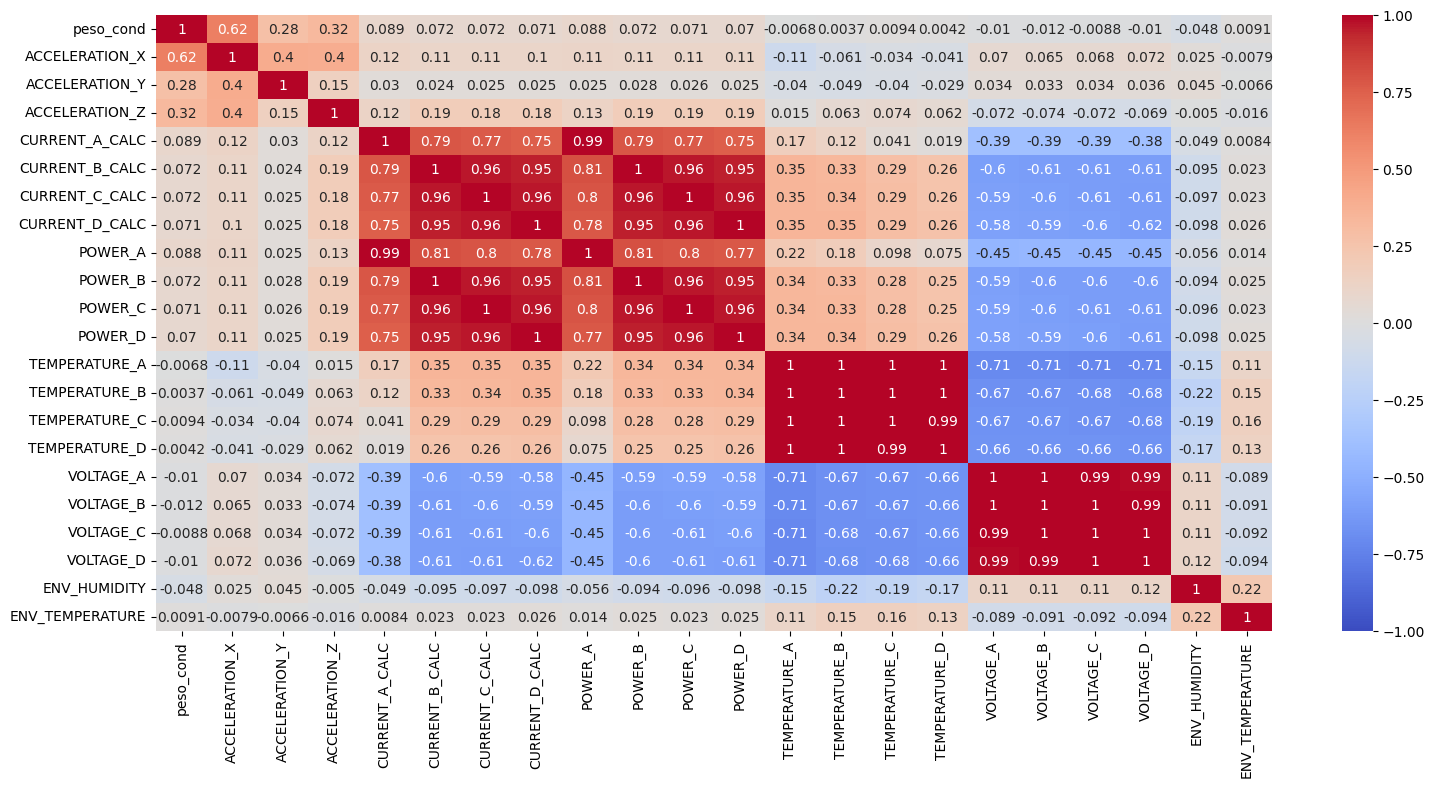

In [ ]:
# Se grafica la matriz de correlaciones
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(18, 8))
sns.heatmap(df_clean_4[numericas].corr(), annot=True, cmap='coolwarm',vmin=-1, vmax=1#,cmap='YlGnBu'
            )
plt.show()


Se implementó diferentes métodos, entre ellos la minimización del VIF.

In [ ]:
# Algoritmo de cálculo de VIF
from sklearn.linear_model import LinearRegression


def calculateVIF(var_predictoras_df):
    var_pred_labels = list(var_predictoras_df.columns)
    num_var_pred = len(var_pred_labels)

    lr_model = LinearRegression()

    result = pd.DataFrame(index = ['VIF'], columns = var_pred_labels)
    result = result.fillna(0)

    for ite in range(num_var_pred):
        x_features = var_pred_labels[:]
        y_feature = var_pred_labels[ite]
        x_features.remove(y_feature)

        x = var_predictoras_df[x_features]
        y = var_predictoras_df[y_feature]

        lr_model.fit(var_predictoras_df[x_features], var_predictoras_df[y_feature])

        result[y_feature] = 1/(1 - lr_model.score(var_predictoras_df[x_features], var_predictoras_df[y_feature]))

    return result

def selectDataUsingVIF(var_predictoras_df, max_VIF = 5):
    result = var_predictoras_df.copy(deep = True)

    VIF = calculateVIF(result)

    while VIF.values.max() > max_VIF:
        col_max = np.where(VIF == VIF.values.max())[1][0]
        features = list(result.columns)
        print('se elimina: ', features[col_max])
        features.remove(features[col_max])
        result = result[features]

        VIF = calculateVIF(result)

    return result

In [ ]:
# selección de prefijos de las variables para facilitar comparación en grupos
vars_iterar = list(set(df_clean_3[numericas].columns.str.split('_').str[0]))
vars_iterar.remove('peso')
vars_iterar

['VOLTAGE', 'ACCELERATION', 'ENV', 'CURRENT', 'POWER', 'TEMPERATURE']

Sin embargo, no se obtiene resultados que comprendan suficiente información.

In [ ]:
# Función para escalar
from sklearn.preprocessing import MinMaxScaler
MinMax = MinMaxScaler(copy=True, feature_range=(0, 1)) # Método MinMax con valores entre 0 y 1
nombres = df_clean_3[numericas].columns
X_Min_Max = df_clean_3[numericas].copy(deep=True)
X_Min_Max[:] = MinMax.fit_transform(df_clean_3[numericas]) # Transformación de los nuevos datos con una escala MinMax
X_Min_Max

,peso_cond,ACCELERATION_X,ACCELERATION_Y,ACCELERATION_Z,CURRENT_A_CALC,CURRENT_B_CALC,CURRENT_C_CALC,CURRENT_D_CALC,POWER_A,POWER_B,POWER_C,POWER_D,TEMPERATURE_A,TEMPERATURE_B,TEMPERATURE_C,TEMPERATURE_D,VOLTAGE_A,VOLTAGE_B,VOLTAGE_C,VOLTAGE_D,ENV_HUMIDITY,ENV_TEMPERATURE
3,0.987654,0.524492,0.347756,0.565217,0.012126,0.002911,0.002346,0.003189,0.000,0.000000,0.000000,0.000000,0.150957,0.114402,0.088696,0.118116,0.984547,0.986470,0.984743,0.985235,0.876631,0.735051
4,0.987654,0.524492,0.377564,0.565217,0.011318,0.002911,0.002639,0.002481,0.000,0.000000,0.000000,0.000000,0.149551,0.114402,0.086770,0.116666,0.984547,0.986470,0.984743,0.985235,0.876631,0.735051
5,0.987654,0.523232,0.382692,0.565217,0.012126,0.003275,0.002053,0.002126,0.000,0.000000,0.000000,0.000000,0.149551,0.114402,0.086770,0.116666,0.984547,0.986470,0.984743,0.985235,0.876631,0.735051
6,0.987654,0.524492,0.382692,0.563731,0.015360,0.002911,0.002639,0.003544,0.000,0.000000,0.000000,0.006849,0.149239,0.114402,0.085982,0.116072,0.983076,0.985240,0.984743,0.983893,0.876631,0.735051
7,0.987654,0.525752,0.372756,0.563731,0.012935,0.002547,0.002053,0.002481,0.000,0.000000,0.000000,0.000000,0.149239,0.114402,0.085982,0.116072,0.983076,0.985240,0.984743,0.983893,0.876631,0.735051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90901,0.985009,0.514727,0.442628,0.579710,0.027486,0.234716,0.034604,0.315379,0.025,0.232394,0.033898,0.315068,NaN,NaN,NaN,NaN,0.158940,0.311193,0.230236,0.249664,NaN,NaN
90902,0.985009,0.510947,0.447756,0.568004,0.031528,0.363173,0.249560,0.253012,0.025,0.366197,0.248588,NaN,NaN,NaN,NaN,NaN,0.158940,0.312423,0.227462,0.249664,NaN,NaN
90903,0.985009,0.508584,0.430128,0.581011,0.028294,0.339156,0.338710,0.000000,0.025,0.338028,0.338983,0.000000,NaN,NaN,NaN,0.622370,0.158205,0.313653,0.227462,NaN,NaN,NaN
90904,0.985009,0.513467,0.425000,0.586957,0.024252,0.324600,0.256305,0.447555,0.025,0.323944,0.254237,0.445205,NaN,NaN,NaN,0.622370,0.157469,0.312423,0.230236,0.248322,NaN,NaN


Se procedió a analizar con ANOVA y a comparar boxplots normalizados.

In [ ]:
df_clean_4_melted = pd.melt(df_clean_4[['fecha_exp']+numericas]
                            , id_vars = ['fecha_exp']
                            , value_vars=numericas
                            )
# df_clean_4_melted

df_clean_4_min_max = df_clean_4.copy(deep=True)
df_clean_4_min_max[numericas] = X_Min_Max

In [ ]:
df_clean_4_min_max_melted = pd.melt(df_clean_4_min_max[['fecha_exp']+numericas]
                            , id_vars = ['fecha_exp']
                            , value_vars=numericas
                            )
df_clean_4_min_max_melted

,fecha_exp,variable,value
0,20220929_E_1_B01,peso_cond,0.987654
1,20220929_E_1_B01,peso_cond,0.987654
2,20220929_E_1_B01,peso_cond,0.987654
3,20220929_E_1_B01,peso_cond,0.987654
4,20220929_E_1_B01,peso_cond,0.987654
...,...,...,...
1735487,20220924-E01,ENV_TEMPERATURE,NaN
1735488,20220924-E01,ENV_TEMPERATURE,NaN
1735489,20220924-E01,ENV_TEMPERATURE,NaN
1735490,20220924-E01,ENV_TEMPERATURE,NaN


In [ ]:
pip install pingouin

     -------------------------------------- 198.6/198.6 kB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 9.2/9.2 MB 11.1 MB/s eta 0:00:00
     ------------------------------------- 994.3/994.3 kB 20.9 MB/s eta 0:00:00
     ------------------------------------- 233.8/233.8 kB 14.9 MB/s eta 0:00:00
  Using cached littleutils-0.2.2.tar.gz (6.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7034 sha256=a66d451edfe17884ffd7128cf0cd95f9dc742b2da8c9fc30b7a89f98974ac0e4
  Stored in directory: c:\users\danie\appdata\local\pip\cache\wheels\e0\3b\9c\d55ff5bc6cfbe70537c4731a22f2ee2462c2e5010b56ac9726
Successfully built littleutils
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pingouin as pg

In [ ]:
import scipy.stats as stats
base = df_clean_4_min_max[['VOLTAGE_A','VOLTAGE_B','VOLTAGE_C','VOLTAGE_D']].dropna()
stats.f_oneway(base['VOLTAGE_A']
               , base['VOLTAGE_B']
               , base['VOLTAGE_C']
               , base['VOLTAGE_D'])

F_onewayResult(statistic=1158182.5617010961, pvalue=0.0)

Los análisis arrojaron diferencias en todas las variables lo que hizo inconveniente la eliminación de alguna por criterios estadísticos.

In [ ]:
from scipy.stats import kstest
kstest(df_clean_3['ENV_HUMIDITY'].dropna().values,'norm')

KstestResult(statistic=0.9871365074581889, pvalue=0.0, statistic_location=37.63, statistic_sign=-1)

Se probó con kruskal

In [ ]:
import scipy.stats as stats
base = df_clean_4_min_max[['CURRENT_B_CALC','CURRENT_D_CALC']].dropna()
stats.stats.kruskal( base['CURRENT_B_CALC'].values
               , base['CURRENT_D_CALC'].values
              )

<ipython-input-31-a40c8eeb4fe1>:3: DeprecationWarning: Please use `kruskal` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  stats.stats.kruskal( base['CURRENT_B_CALC'].values


KruskalResult(statistic=73.67857243316926, pvalue=9.193144017075205e-18)

Se optó por continuar con todas las variables.

## Imputación

In [14]:
df_clean_5 = df_clean_4.copy(deep=True)

In [15]:
variables_imputar = ['ACCELERATION_X',
 'ACCELERATION_Y',
 'ACCELERATION_Z',
 'CURRENT_A_CALC',
 'CURRENT_B_CALC',
 'CURRENT_C_CALC',
 'CURRENT_D_CALC',
 'POWER_A',
 'POWER_B',
 'POWER_C',
 'POWER_D',
 'TEMPERATURE_A',
 'TEMPERATURE_B',
 'TEMPERATURE_C',
 'TEMPERATURE_D',
 'VOLTAGE_A',
 'VOLTAGE_B',
 'VOLTAGE_C',
 'VOLTAGE_D',
 'ENV_HUMIDITY',
 'ENV_TEMPERATURE']


Se imputaron los registros faltantes mediante el método interpolate y una aproximación lineal. Los restantes, se imputaron con el primer registro no nulo por ciclo.

In [16]:
for i in variables_imputar:
  df_clean_5[i] = df_clean_5.groupby('fecha_exp',group_keys=False)[i].apply(lambda group: group.interpolate(method='linear'))

df_clean_5['TEMPERATURE_A'] = df_clean_5['TEMPERATURE_A'].fillna(df_clean_5.groupby('fecha_exp')['TEMPERATURE_A'].transform('first'))
df_clean_5['TEMPERATURE_B'] = df_clean_5['TEMPERATURE_B'].fillna(df_clean_5.groupby('fecha_exp')['TEMPERATURE_B'].transform('first'))


In [17]:
df_clean_5 = df_clean_5.sort_values(['fecha','exp','new_time','bateria'],ascending=[True,True,True,True]).reset_index(drop=True)

Se logró mantener el comportamiento previo

# Variable objetivo

Se calcula el RUL a partir de la duración de cada ciclo, como un recuento descendente

In [18]:
df_clean_5['RUL_registro'] = df_clean_5.groupby('fecha_exp')['new_time'].transform('max')-df_clean_5['new_time']+1

In [19]:
df_clean_5['duracion_minutos'] = \
df_clean_5['duracion'].str.split(':').str[0].astype(int)*60\
+df_clean_5['duracion'].str.split(':').str[1].astype(int)\
+df_clean_5['duracion'].str.split(':').str[2].astype(int)/60

df_clean_5.loc[df_clean_5['fecha_exp']=='20220929_E_1_B01','duracion_minutos'] =round(df_clean_5.loc[df_clean_5['fecha_exp']=='20220929_E_1_B01'].shape[0]/60)
df_clean_5.loc[df_clean_5['fecha_exp']=='20220929_E_2_B01','duracion_minutos'] =round(df_clean_5.loc[df_clean_5['fecha_exp']=='20220929_E_2_B01'].shape[0]/60)

Se calcula el RUL desde una perspectiva general, como un recuento descendente a partir de la duración total de la batería.

In [20]:
dur_bateria = df_clean_5.groupby(['bateria','fecha_exp'])['duracion_minutos'].max().reset_index()
dur_bateria['duracion_total_bateria'] = dur_bateria.groupby('bateria')['duracion_minutos'].transform('sum')
dur_bateria['temporal']=dur_bateria['duracion_minutos'].shift(periods=1).fillna(0)
dur_bateria['temporal']=dur_bateria.groupby('bateria')['temporal'].cumsum()
dur_bateria['RUL_general']=dur_bateria['duracion_total_bateria']-dur_bateria['temporal']
dur_bateria = dur_bateria[['fecha_exp','RUL_general']]
dur_bateria

,fecha_exp,RUL_general
0,20220909-E01,1779.0
1,20220911-E01,1751.0
2,20220912_E_1_B01,1719.0
3,20220913_E_1_B01,1689.0
4,20220914-E01,1627.0
5,20220914-E02,1580.0
6,20220915_E_1_B01,1515.0
7,20220921-E01,1458.0
8,20220921-E02,1402.0
9,20220922_E_1_B01,1290.0


In [21]:
df_clean_5 = df_clean_5.merge(dur_bateria,on='fecha_exp',how='left')

In [ ]:
df_clean_5['RUL_general']-df_clean_5['new_time']+1

0        1779.0
1        1778.0
2        1777.0
3        1776.0
4        1775.0
          ...  
78881   -1139.0
78882   -1140.0
78883   -1141.0
78884   -1142.0
78885   -1143.0
Length: 78886, dtype: float64

Finalmente observamos el comportamiento del RUL general, que se someterá a pruebas con distintos modelos de regresión. Estos modelos no necesitan considerar las particiones de los ciclos, puesto que se espera que el modelo sea capaz de determinar el rul aproximado a partir de los valores del resto de variables.

<Axes: ylabel='RUL_registro'>

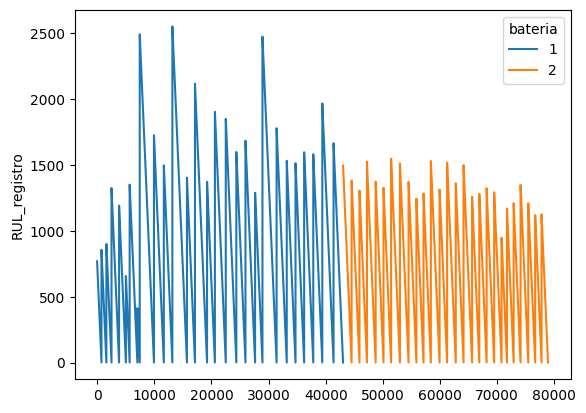

In [22]:
sns.lineplot(data = df_clean_5
               , x = df_clean_5.index
               ,y ='RUL_registro'
               ,hue='bateria'
               #, ax = axes[n]
              #  ,kde = True
              #  ,kde_kws = {'bw_adjust': 0.5}
               )

<Axes: ylabel='RUL_general'>

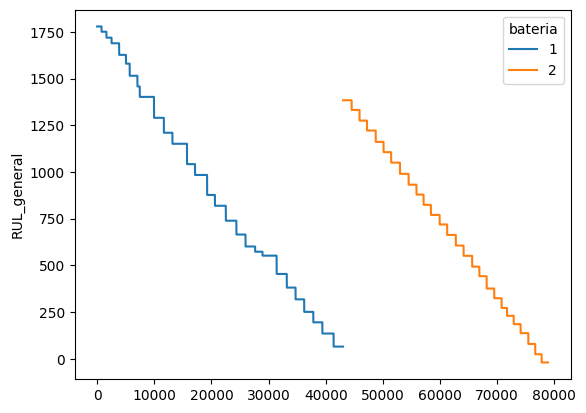

In [ ]:
sns.lineplot(data = df_clean_5
               , x = df_clean_5.index
               ,y ='RUL_general'
               ,hue='bateria'
               #, ax = axes[n]
              #  ,kde = True
              #  ,kde_kws = {'bw_adjust': 0.5}
               )

<Axes: xlabel='new_time', ylabel='RUL_general'>

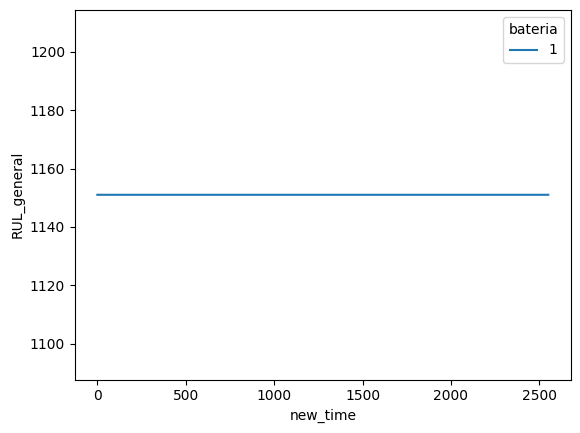

In [ ]:
sns.lineplot(data = df_clean_5[df_clean_5['fecha_exp']=='20220923-E02']
               , x = df_clean_5[df_clean_5['fecha_exp']=='20220923-E02']['new_time']
               ,y ='RUL_general'
               ,hue='bateria'
               #, ax = axes[n]
              #  ,kde = True
              #  ,kde_kws = {'bw_adjust': 0.5}
               )

# Modelos

In [ ]:
df_clean_5.head(2)

,tiempo,fecha_exp,fecha,exp,motor,bateria,peso_cond,lugar,duracion,distancia,vel_max,vel_prom,ACCELERATION_X,ACCELERATION_Y,ACCELERATION_Z,CURRENT_A_CALC,CURRENT_B_CALC,CURRENT_C_CALC,CURRENT_D_CALC,POWER_A,POWER_B,POWER_C,POWER_D,TEMPERATURE_A,TEMPERATURE_B,TEMPERATURE_C,TEMPERATURE_D,VOLTAGE_A,VOLTAGE_B,VOLTAGE_C,VOLTAGE_D,ENV_HUMIDITY,ENV_TEMPERATURE,new_time,RUL_registro,duracion_minutos,RUL_general
0,1,20220909-E01,20220909,E01,1,1,110.0,palmas,0:28:00,0.0,0.0,0.0,9.52,2.50,2.50,0.13,0.08,0.11,0.08,0.0,0.00,0.01,0.0,20.63,20.72,20.72,20.8,37.92,18.5,18.41,18.5,72.7,22.5,1,769,28.0,1779.0
1,2,20220909-E01,20220909,E01,1,1,110.0,palmas,0:28:00,0.0,0.0,0.0,9.44,2.73,2.57,0.16,0.11,0.09,0.08,0.0,0.01,0.00,0.0,20.63,20.72,20.72,20.8,37.92,18.5,18.41,18.5,72.7,22.5,2,768,28.0,1779.0


In [ ]:
# X = df_clean_5.iloc[:,9:-4]

In [23]:
lista_metroplus = df_clean[df_clean['lugar']=='metroplus']['fecha_exp'].unique()

In [ ]:
df_clean_5[df_clean_5['fecha_exp'].isin(lista_metroplus)].iloc[:,15:-6]

,CURRENT_A_CALC,CURRENT_B_CALC,CURRENT_C_CALC,CURRENT_D_CALC,POWER_A,POWER_B,POWER_C,POWER_D,TEMPERATURE_A,TEMPERATURE_B,TEMPERATURE_C,TEMPERATURE_D,VOLTAGE_A,VOLTAGE_B,VOLTAGE_C,VOLTAGE_D
7047,0.17,0.08,0.06,0.080,0.00,0.00,0.00,0.00,19.93,19.93,19.93,19.75,41.64,20.31,20.21,20.310
7048,0.20,0.08,0.06,0.070,0.00,0.00,0.00,0.00,19.93,19.93,19.93,19.75,41.64,20.31,20.21,20.310
7049,0.07,0.05,0.08,0.080,0.00,0.00,0.00,0.00,19.93,19.84,19.93,19.75,41.64,20.31,20.21,20.310
7050,0.12,0.07,0.08,0.070,0.00,0.00,0.00,0.00,19.93,19.84,19.93,19.75,41.64,20.31,20.21,20.310
7051,0.20,0.08,0.07,0.080,0.00,0.00,0.00,0.00,19.84,19.88,19.75,19.88,41.64,20.31,20.21,20.310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76638,1.31,7.74,8.34,8.500,0.04,0.40,0.43,0.44,49.77,49.77,49.77,49.77,30.90,15.08,14.97,15.030
76639,1.11,7.72,8.62,8.120,0.04,0.40,0.45,0.42,49.77,49.77,49.77,49.77,30.84,15.04,14.99,15.055
76640,1.01,9.34,9.13,8.275,0.03,0.48,0.47,0.49,49.77,49.77,49.77,49.77,30.88,15.04,14.97,15.080
76641,1.25,8.48,9.40,8.430,0.04,0.44,0.49,0.44,49.77,49.77,49.77,49.77,30.77,15.00,14.95,15.010


In [ ]:
df_clean_5['RUL_registro']

In [25]:
X.shape

(49537, 16)

In [24]:
X = df_clean_5[df_clean_5['fecha_exp'].isin(lista_metroplus)].iloc[:,15:-6]#[['CURRENT_A_CALC','POWER_A','TEMPERATURE_A','VOLTAGE_A']]
y = df_clean_5[df_clean_5['fecha_exp'].isin(lista_metroplus)]['RUL_registro']
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Se escalan los valores del dataset entrenamiento y prueba de las columnas numéricas
X_Min_Max=X.copy(deep=True)
X_Min_Max[X.columns] = scaler.fit_transform(X)
# X_test[num_vars] = scaler.fit_transform(X_test[num_vars])

X_Min_Max.head()

,CURRENT_A_CALC,CURRENT_B_CALC,CURRENT_C_CALC,CURRENT_D_CALC,POWER_A,POWER_B,POWER_C,POWER_D,TEMPERATURE_A,TEMPERATURE_B,TEMPERATURE_C,TEMPERATURE_D,VOLTAGE_A,VOLTAGE_B,VOLTAGE_C,VOLTAGE_D
7047,0.014580,0.002911,0.001760,0.002835,0.0,0.0,0.0,0.0,0.011238,0.012531,0.014086,0.047634,0.98721,0.990123,0.987635,0.987934
7048,0.017153,0.002911,0.001760,0.002481,0.0,0.0,0.0,0.0,0.011238,0.012531,0.014086,0.047634,0.98721,0.990123,0.987635,0.987934
7049,0.006003,0.001820,0.002346,0.002835,0.0,0.0,0.0,0.0,0.011238,0.011567,0.014086,0.047634,0.98721,0.990123,0.987635,0.987934
7050,0.010292,0.002547,0.002346,0.002481,0.0,0.0,0.0,0.0,0.011238,0.011567,0.014086,0.047634,0.98721,0.990123,0.987635,0.987934
7051,0.017153,0.002911,0.002053,0.002835,0.0,0.0,0.0,0.0,0.010343,0.011995,0.012262,0.048965,0.98721,0.990123,0.987635,0.987934


In [ ]:
# Se crean los datasets de entrenamiento y prueba para las variables de entrada y salida
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                                        X_Min_Max,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 123,
                                        shuffle      = True
                                    )

In [ ]:
X2 = df_clean_5[~df_clean_5['fecha_exp'].isin(lista_metroplus)].iloc[:,9:-4]
y2 = df_clean_5[~df_clean_5['fecha_exp'].isin(lista_metroplus)]['RUL_general']
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Se escalan los valores del dataset entrenamiento y prueba de las columnas numéricas
X2_Min_Max=X2.copy(deep=True)
X2_Min_Max[X2.columns] = scaler.fit_transform(X2)
# X_test[num_vars] = scaler.fit_transform(X_test[num_vars])

X2_Min_Max.head()

# Se crean los datasets de entrenamiento y prueba para las variables de entrada y salida
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(
                                        X2_Min_Max,
                                        y2.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 123,
                                        shuffle      = True
                                    )

## SVM

In [ ]:
%%time
from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train, y_train)

c:\Users\danie\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CPU times: total: 1min 18s
Wall time: 1min 19s


SVR()

In [ ]:
%%time
#Se entena el modelo con múltiples hiperparámetros buscando el mejor
from sklearn.model_selection import GridSearchCV
#Se crea una instancia de una SVR Regression
SVMR = SVR()

#Se establecen los hiperparámetros para el Kernel lineal
svm_linear = {'C': [0.1, 1, 10, 100, 1000],
              'kernel': ['linear']}

#Se establecen los hiperparámetros para el Kernel polinomico
svm_poly = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 'auto', 'scale'],
              'degree': [2, 3],
              'kernel': ['poly']}

#Se establecen los hiperparámetros para los kernels rbf y sigmoid
svm_others = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001,'auto', 'scale'],
              'kernel': [ 'rbf', 'sigmoid']}

#Se unen todos los hiperparametros en una lista de diccionarios
parameters = [svm_linear, svm_poly, svm_others]


# Se define un GridSearchCV con una validacion cruzada de 10 pliegues y con todos los
#hierparametros establecidos anteriormente
grid = GridSearchCV(SVMR, param_grid=parameters, cv=5, verbose=3,n_jobs=-1)

#Se entrena el GridSearchCV anterior (2 min. aprox.) con los datos completos
grid_result = grid.fit(X_train,y_train)

grid_result

Fitting 5 folds for each of 125 candidates, totalling 625 fits


c:\Users\danie\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CPU times: total: 1min 41s
Wall time: 3h 17min 9s


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid=[{'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [0.1, 1, 10, 100, 1000], 'degree': [2, 3],
                          'gamma': [1, 0.1, 0.01, 0.001, 'auto', 'scale'],
                          'kernel': ['poly']},
                         {'C': [0.1, 1, 10, 100, 1000],
                          'gamma': [1, 0.1, 0.01, 0.001, 'auto', 'scale'],
                          'kernel': ['rbf', 'sigmoid']}],
             verbose=3)

In [ ]:
pd.DataFrame(grid_result.cv_results_).sort_values('mean_test_score',ascending=False).head(10)#.to_excel('G:/Mi unidad/Especializacion/Monografia/resultados_Grid_SVM.xlsx',index=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,param_degree,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
123,119.689047,1.292684,51.704543,2.527041,1000,rbf,NaN,scale,"{'C': 1000, 'gamma': 'scale', 'kernel': 'rbf'}",0.841292,0.854233,0.836847,0.835288,0.840787,0.841689,0.006675,1
113,113.499703,0.821821,52.179051,0.945535,1000,rbf,NaN,1,"{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}",0.840811,0.853355,0.836177,0.834283,0.839971,0.840919,0.006665,2
111,104.012489,1.840713,54.121962,1.502588,100,rbf,NaN,scale,"{'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}",0.836925,0.848891,0.832342,0.830365,0.835467,0.836798,0.006470,3
101,101.701672,1.454477,53.195876,1.265485,100,rbf,NaN,1,"{'C': 100, 'gamma': 1, 'kernel': 'rbf'}",0.835706,0.847404,0.831195,0.828909,0.833960,0.835435,0.006420,4
99,102.941894,0.810803,53.970724,1.474004,10,rbf,NaN,scale,"{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}",0.828112,0.838940,0.823545,0.820535,0.825858,0.827398,0.006293,5
89,95.562467,0.745239,52.934439,2.240451,10,rbf,NaN,1,"{'C': 10, 'gamma': 1, 'kernel': 'rbf'}",0.826915,0.837652,0.822566,0.819276,0.824576,0.826197,0.006252,6
115,104.092915,2.482057,53.871130,0.878732,1000,rbf,NaN,0.1,"{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}",0.817547,0.826765,0.815630,0.810360,0.817124,0.817485,0.005300,7
121,107.997448,0.279571,56.025341,0.855430,1000,rbf,NaN,auto,"{'C': 1000, 'gamma': 'auto', 'kernel': 'rbf'}",0.813548,0.822215,0.811558,0.806422,0.812855,0.813320,0.005101,8
64,1047.820890,83.312895,14.867162,0.391450,1000,poly,3,scale,"{'C': 1000, 'degree': 3, 'gamma': 'scale', 'ke...",0.805601,0.815749,0.808534,0.802195,0.812177,0.808851,0.004767,9
59,729.806495,66.783121,15.161018,0.216240,1000,poly,3,1,"{'C': 1000, 'degree': 3, 'gamma': 1, 'kernel':...",0.806403,0.815331,0.808574,0.801266,0.811439,0.808603,0.004733,10


In [ ]:
# Se identifican los mejores hiperparámetros
best_params = grid_result.best_params_
print('Best Parameters : ',best_params)

Best Parameters :  {'C': 1000, 'gamma': 'scale', 'kernel': 'rbf'}


In [ ]:
%%time
from sklearn.svm import SVR

svr = SVR(C=1000,gamma='scale',kernel='rbf')
svr.fit(X_train, y_train)

c:\Users\danie\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CPU times: total: 1min 19s
Wall time: 1min 19s


SVR(C=1000)

In [ ]:
y_pred = svr.predict(X_test)

from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(y_test, y_pred))

173.90969835520008

In [ ]:
%%time
from sklearn.svm import SVR

svr = SVR(C=10,gamma='scale',kernel='rbf')
svr.fit(X_train, y_train)

y_pred = svr.predict(X_test)

from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(y_test, y_pred))

c:\Users\danie\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CPU times: total: 1min 42s
Wall time: 1min 43s


181.5015599514896

## Gradient boost

In [ ]:
%%time
from sklearn.ensemble import GradientBoostingRegressor

reg = GradientBoostingRegressor(random_state=0
                                ,learning_rate=0.75)
reg.fit(X_train, y_train)

c:\Users\danie\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CPU times: total: 19.5 s
Wall time: 19.8 s


GradientBoostingRegressor(learning_rate=0.75, random_state=0)

### Afinamiento de parámetros

In [ ]:
from sklearn import metrics

In [ ]:
metrics.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

#### learning_rate

In [ ]:
from sklearn.model_selection import cross_validate

Mejor valor de learning_rate
0.55
CPU times: total: 3min 51s
Wall time: 8min 2s


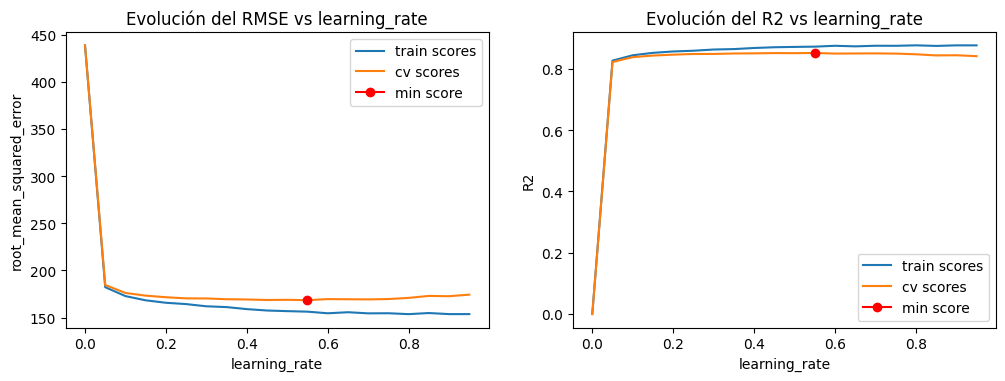

In [ ]:
%%time
# Validación empleando k-cross-validation y neg_root_mean_squared_error
# ==============================================================================
from sklearn.model_selection import cross_val_score
train_scores_rmse = []
train_scores_r2 = []
cv_scores_rmse    = []
cv_scores_r2    = []

# Valores evaluados
listado = np.arange (0, 1, 0.05)
hiperparametro = 'learning_rate'

# Bucle para entrenar un modelo con cada valor de n_estimators y extraer su error
# de entrenamiento y de k-cross-validation.
for elemento in listado:

    modelo = GradientBoostingRegressor(
                learning_rate = elemento,
                #n_jobs       = -1,
                random_state = 123
             )

    # Error de train
    modelo.fit(X_train, y_train.reshape(-1))
    predicciones = modelo.predict(X = X_train)
    rmse_train_score = mean_squared_error(
            y_true  = y_train.reshape(-1),
            y_pred  = predicciones,
            squared = False
           )
    r2_train_score = r2_score(
            y_true  = y_train.reshape(-1),
            y_pred  = predicciones
           )
    train_scores_rmse.append(rmse_train_score)
    train_scores_r2.append(r2_train_score)

    # Error de validación cruzada
    scores = cross_validate(
                estimator = modelo,
                X         = X_train,
                y         = y_train.reshape(-1),
                scoring   = ['neg_root_mean_squared_error','r2']
                # ,
                ,cv        = 5
                ,n_jobs=-1
             )
    # Se agregan los scores de cross_val_score() y se pasa a positivo
    cv_scores_rmse.append(-1*scores['test_neg_root_mean_squared_error'].mean())
    cv_scores_r2.append(scores['test_r2'].mean())

# Gráfico con la evolución de los errores

fig, ax  = plt.subplots(1,2,figsize=(2*6, 3.84))
ax[0].plot(listado, train_scores_rmse, label="train scores")
ax[0].plot(listado, cv_scores_rmse, label="cv scores")
ax[0].plot(listado[np.argmin(cv_scores_rmse)], min(cv_scores_rmse),marker='o', color = "red", label="min score")
ax[0].set_ylabel("root_mean_squared_error")
ax[0].set_xlabel(hiperparametro)
ax[0].set_title("Evolución del RMSE vs "+hiperparametro)
ax[0].legend()

ax[1].plot(listado, train_scores_r2, label="train scores")
ax[1].plot(listado, cv_scores_r2, label="cv scores")
ax[1].plot(listado[np.argmax(cv_scores_r2)], max(cv_scores_r2),marker='o', color = "red", label="min score")
ax[1].set_ylabel("R2")
ax[1].set_xlabel(hiperparametro)
ax[1].set_title("Evolución del R2 vs "+hiperparametro)
ax[1].legend()

print('Mejor valor de '+hiperparametro)
print(f"{listado[np.argmin(cv_scores_rmse)]}")

Se observa que tiende al sobreajuste a medida que aumenta el hiperparámetro learning_rate. Sin embargo, alcanza un error bajo alrededor de 0.6

#### n_estimators

Mejor valor de n_estimators
300
CPU times: total: 2min 10s
Wall time: 4min 47s


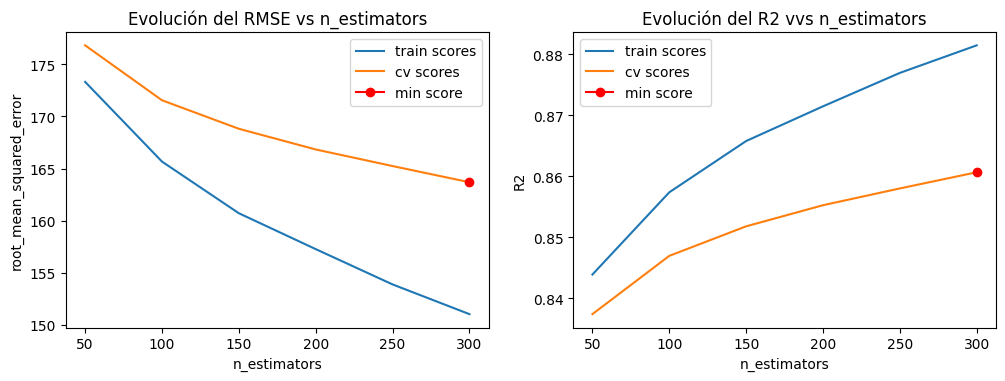

In [ ]:
%%time
# Validación empleando k-cross-validation y neg_root_mean_squared_error
# ==============================================================================
from sklearn.model_selection import cross_val_score
train_scores_rmse = []
train_scores_r2 = []
cv_scores_rmse    = []
cv_scores_r2    = []

# Valores evaluados
listado = range(50,350,50)
hiperparametro = 'n_estimators'

# Bucle para entrenar un modelo con cada valor de n_estimators y extraer su error
# de entrenamiento y de k-cross-validation.
for n_estimators in listado:

    modelo = GradientBoostingRegressor(
                n_estimators = n_estimators,
                learning_rate = 0.2,
                #n_jobs       = -1,
                random_state = 123
             )

    # Error de train
    modelo.fit(X_train, y_train.reshape(-1))
    predicciones = modelo.predict(X = X_train)
    rmse_train_score = mean_squared_error(
            y_true  = y_train.reshape(-1),
            y_pred  = predicciones,
            squared = False
           )
    r2_train_score = r2_score(
            y_true  = y_train.reshape(-1),
            y_pred  = predicciones
           )
    train_scores_rmse.append(rmse_train_score)
    train_scores_r2.append(r2_train_score)

    # Error de validación cruzada
    scores = cross_validate(
                estimator = modelo,
                X         = X_train,
                y         = y_train.reshape(-1),
                scoring   = ['neg_root_mean_squared_error','r2']
                # ,
                ,cv        = 5
                ,n_jobs=-1
             )
    # Se agregan los scores de cross_val_score() y se pasa a positivo
    cv_scores_rmse.append(-1*scores['test_neg_root_mean_squared_error'].mean())
    cv_scores_r2.append(scores['test_r2'].mean())

# Gráfico con la evolución de los errores

fig, ax  = plt.subplots(1,2,figsize=(2*6, 3.84))
ax[0].plot(listado, train_scores_rmse, label="train scores")
ax[0].plot(listado, cv_scores_rmse, label="cv scores")
ax[0].plot(listado[np.argmin(cv_scores_rmse)], min(cv_scores_rmse),marker='o', color = "red", label="min score")
ax[0].set_ylabel("root_mean_squared_error")
ax[0].set_xlabel(hiperparametro)
ax[0].set_title("Evolución del RMSE vs "+hiperparametro)
ax[0].legend()

ax[1].plot(listado, train_scores_r2, label="train scores")
ax[1].plot(listado, cv_scores_r2, label="cv scores")
ax[1].plot(listado[np.argmax(cv_scores_r2)], max(cv_scores_r2),marker='o', color = "red", label="min score")
ax[1].set_ylabel("R2")
ax[1].set_xlabel(hiperparametro)
ax[1].set_title("Evolución del R2 vvs "+hiperparametro)
ax[1].legend()

print('Mejor valor de '+hiperparametro)
print(f"{listado[np.argmin(cv_scores_rmse)]}")

Se observa un riesgo elevado de overfit, aunque sigue mejorando el error a medida que aumentan los estimadores. Por decisión del analista, se opta por tomar 100 estimadores

#### max_depth

In [ ]:
%%time
# Validación empleando k-cross-validation y neg_root_mean_squared_error
# ==============================================================================
from sklearn.model_selection import cross_val_score
train_scores_rmse = []
train_scores_r2 = []
cv_scores_rmse    = []
cv_scores_r2    = []

# Valores evaluados
listado = range(1,8,1)
hiperparametro = 'max_depth'


# Bucle para entrenar un modelo con cada valor de n_estimators y extraer su error
# de entrenamiento y de k-cross-validation.
for elemento in listado:

    modelo = GradientBoostingRegressor(
                n_estimators = 100,
                max_depth = elemento,
                learning_rate = 0.2,
                #n_jobs       = -1,
                random_state = 123
             )

    # Error de train
    modelo.fit(X_train, y_train.reshape(-1))
    predicciones = modelo.predict(X = X_train)
    rmse_train_score = mean_squared_error(
            y_true  = y_train.reshape(-1),
            y_pred  = predicciones,
            squared = False
           )
    r2_train_score = r2_score(
            y_true  = y_train.reshape(-1),
            y_pred  = predicciones
           )
    train_scores_rmse.append(rmse_train_score)
    train_scores_r2.append(r2_train_score)

    # Error de validación cruzada
    scores = cross_validate(
                estimator = modelo,
                X         = X_train,
                y         = y_train.reshape(-1),
                scoring   = ['neg_root_mean_squared_error','r2']
                # ,
                ,cv        = 5
                ,n_jobs=-1
             )
    # Se agregan los scores de cross_val_score() y se pasa a positivo
    cv_scores_rmse.append(-1*scores['test_neg_root_mean_squared_error'].mean())
    cv_scores_r2.append(scores['test_r2'].mean())



CPU times: total: 1min 47s
Wall time: 3min 43s


Mejor valor de max_depth
7


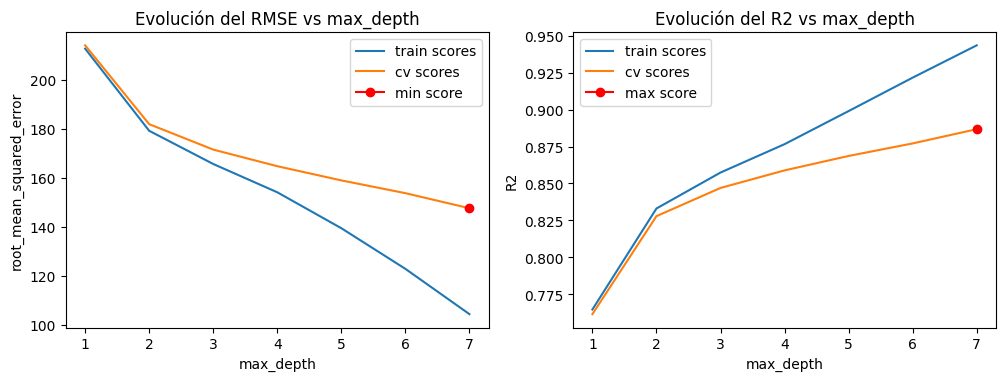

In [ ]:
# Gráfico con la evolución de los errores

fig, ax  = plt.subplots(1,2,figsize=(2*6, 3.84))
ax[0].plot(listado, train_scores_rmse, label="train scores")
ax[0].plot(listado, cv_scores_rmse, label="cv scores")
ax[0].plot(listado[np.argmin(cv_scores_rmse)], min(cv_scores_rmse),marker='o', color = "red", label="min score")
ax[0].set_ylabel("root_mean_squared_error")
ax[0].set_xlabel(hiperparametro)
ax[0].set_title("Evolución del RMSE vs "+hiperparametro)
ax[0].legend()

ax[1].plot(listado, train_scores_r2, label="train scores")
ax[1].plot(listado, cv_scores_r2, label="cv scores")
ax[1].plot(listado[np.argmax(cv_scores_r2)], max(cv_scores_r2),marker='o', color = "red", label="max score")
ax[1].set_ylabel("R2")
ax[1].set_xlabel(hiperparametro)
ax[1].set_title("Evolución del R2 vs "+hiperparametro)
ax[1].legend()

print('Mejor valor de '+hiperparametro)
print(f"{listado[np.argmin(cv_scores_rmse)]}")

Si bien se sugiere una profundidad de 7 según la evaluación gráfica, se observa una tendencia al overfit desde 3. Se opta por una profundidad de 3. Con esto en cuenta, procedemos a evaluar diferentes medidas de desempeño.

### Cross-validation

In [ ]:
from sklearn.model_selection import cross_validate
# Se crea un modelo SVR con los mejores hiperparámetros
best_gbr = GradientBoostingRegressor(random_state=0
                                     ,learning_rate=0.2
                                     ,max_depth=3
                                     ,n_estimators=100
                                     ,verbose=3
                                     )

# Se definen los Pliegues (Folks)
CV = 10


# Definición de metricas a evaluar el modelo
scoring = {
    'r2':'r2',
    'neg_mean_squared_error(MSE)': 'neg_mean_squared_error',
    'root_mean_squared_error(RMSE)': 'neg_root_mean_squared_error',
    'mean_absolute_error(MAE)': 'neg_mean_absolute_error',
    'neg_mean_absolute_percentage_error(MAPE)': 'neg_mean_absolute_percentage_error'
    }


#Se se ejecuta una validación cruzada utilizando las métricas definidas anteriormente
scores = cross_validate(best_gbr, X_Min_Max, y,cv=CV, scoring= scoring,n_jobs=-1)

In [ ]:
pd.DataFrame(scores).mean()

fit_time                                            19.380573
score_time                                           0.011213
test_r2                                              0.799922
test_neg_mean_squared_error(MSE)                -39228.658482
test_root_mean_squared_error(RMSE)                -183.944845
test_mean_absolute_error(MAE)                     -139.525648
test_neg_mean_absolute_percentage_error(MAPE)       -0.676752
dtype: float64

In [ ]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = {'n_estimators': [15],
              'max_features': [9, 11, 13, 15],
              'max_depth'   : [ 3, 10, 20]
             }

# Búsqueda por grid search con validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator  = RandomForestRegressor(random_state = 123),
        param_grid = param_grid,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = - 1,
        cv         = 5,
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

NameError: name 'GridSearchCV' is not defined

## AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

reg = AdaBoostRegressor(random_state=0, n_estimators=100)
reg.fit(X_train, y_train)

c:\Users\danie\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostRegressor(n_estimators=100, random_state=0)

### Afinamiento de parámetros

#### learning_rate

In [ ]:
%%time
# Validación empleando k-cross-validation y neg_root_mean_squared_error
# ==============================================================================
from sklearn.model_selection import cross_val_score
train_scores_rmse = []
train_scores_r2 = []
cv_scores_rmse    = []
cv_scores_r2    = []

# Valores evaluados
listado = np.arange(0.1,1,0.1)
hiperparametro = 'learning_rate'


# Bucle para entrenar un modelo con cada valor de n_estimators y extraer su error
# de entrenamiento y de k-cross-validation.
for elemento in listado:

    modelo = AdaBoostRegressor(
                # n_estimators = elemento,
                # max_depth = max_depth,
                learning_rate = elemento,
                random_state = 123
             )

    # Error de train
    modelo.fit(X_train, y_train.reshape(-1))
    predicciones = modelo.predict(X = X_train)
    rmse_train_score = mean_squared_error(
            y_true  = y_train.reshape(-1),
            y_pred  = predicciones,
            squared = False
           )
    r2_train_score = r2_score(
            y_true  = y_train.reshape(-1),
            y_pred  = predicciones
           )
    train_scores_rmse.append(rmse_train_score)
    train_scores_r2.append(r2_train_score)

    # Error de validación cruzada
    scores = cross_validate(
                estimator = modelo,
                X         = X_train,
                y         = y_train.reshape(-1),
                scoring   = ['neg_root_mean_squared_error','r2']
                # ,
                ,cv        = 5
                ,n_jobs=-1
             )
    # Se agregan los scores de cross_val_score() y se pasa a positivo
    cv_scores_rmse.append(-1*scores['test_neg_root_mean_squared_error'].mean())
    cv_scores_r2.append(scores['test_r2'].mean())



CPU times: total: 32.9 s
Wall time: 1min 12s


Mejor valor de learning_rate
0.2


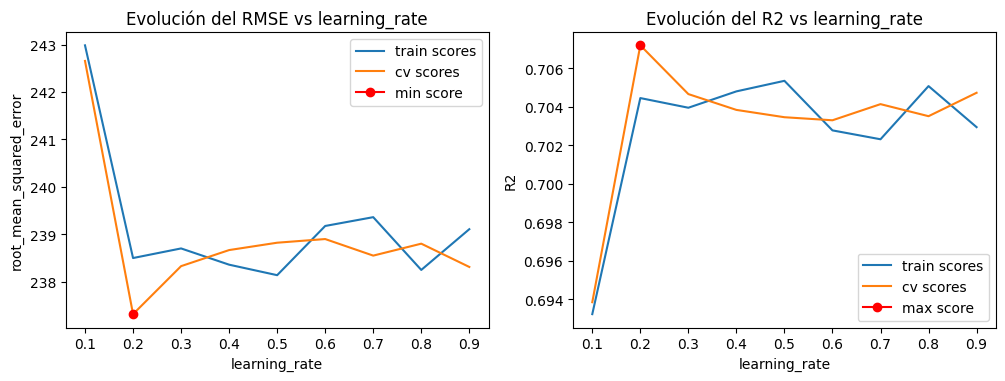

In [ ]:
# Gráfico con la evolución de los errores

fig, ax  = plt.subplots(1,2,figsize=(2*6, 3.84))
ax[0].plot(listado, train_scores_rmse, label="train scores")
ax[0].plot(listado, cv_scores_rmse, label="cv scores")
ax[0].plot(listado[np.argmin(cv_scores_rmse)], min(cv_scores_rmse),marker='o', color = "red", label="min score")
ax[0].set_ylabel("root_mean_squared_error")
ax[0].set_xlabel(hiperparametro)
ax[0].set_title("Evolución del RMSE vs "+hiperparametro)
ax[0].legend()

ax[1].plot(listado, train_scores_r2, label="train scores")
ax[1].plot(listado, cv_scores_r2, label="cv scores")
ax[1].plot(listado[np.argmax(cv_scores_r2)], max(cv_scores_r2),marker='o', color = "red", label="max score")
ax[1].set_ylabel("R2")
ax[1].set_xlabel(hiperparametro)
ax[1].set_title("Evolución del R2 vs "+hiperparametro)
ax[1].legend()

print('Mejor valor de '+hiperparametro)
print(f"{listado[np.argmin(cv_scores_rmse)]}")

#### loss + learning rate

In [ ]:
%%time
# Validación empleando k-cross-validation y neg_root_mean_squared_error
# ==============================================================================
from sklearn.model_selection import cross_val_score
train_scores_rmse = []
train_scores_r2 = []
cv_scores_rmse    = []
cv_scores_r2    = []

# Valores evaluados
listado = np.arange(0.1,1,0.1)
hiperparametro = 'learning_rate'


# Bucle para entrenar un modelo con cada valor de n_estimators y extraer su error
# de entrenamiento y de k-cross-validation.
for elemento in listado:

    modelo = AdaBoostRegressor(
                # n_estimators = elemento,
                # max_depth = max_depth,
                learning_rate = elemento,
                random_state = 123
                ,loss='exponential'
             )

    # Error de train
    modelo.fit(X_train, y_train.reshape(-1))
    predicciones = modelo.predict(X = X_train)
    rmse_train_score = mean_squared_error(
            y_true  = y_train.reshape(-1),
            y_pred  = predicciones,
            squared = False
           )
    r2_train_score = r2_score(
            y_true  = y_train.reshape(-1),
            y_pred  = predicciones
           )
    train_scores_rmse.append(rmse_train_score)
    train_scores_r2.append(r2_train_score)

    # Error de validación cruzada
    scores = cross_validate(
                estimator = modelo,
                X         = X_train,
                y         = y_train.reshape(-1),
                scoring   = ['neg_root_mean_squared_error','r2']
                # ,
                ,cv        = 5
                ,n_jobs=-1
             )
    # Se agregan los scores de cross_val_score() y se pasa a positivo
    cv_scores_rmse.append(-1*scores['test_neg_root_mean_squared_error'].mean())
    cv_scores_r2.append(scores['test_r2'].mean())



CPU times: total: 47.5 s
Wall time: 1min 40s


Mejor valor de learning_rate
0.2


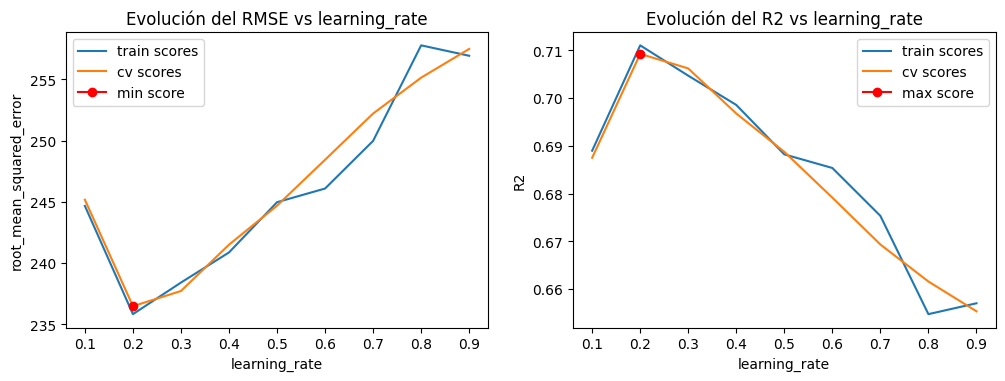

In [ ]:
# Gráfico con la evolución de los errores

fig, ax  = plt.subplots(1,2,figsize=(2*6, 3.84))
ax[0].plot(listado, train_scores_rmse, label="train scores")
ax[0].plot(listado, cv_scores_rmse, label="cv scores")
ax[0].plot(listado[np.argmin(cv_scores_rmse)], min(cv_scores_rmse),marker='o', color = "red", label="min score")
ax[0].set_ylabel("root_mean_squared_error")
ax[0].set_xlabel(hiperparametro)
ax[0].set_title("Evolución del RMSE vs "+hiperparametro)
ax[0].legend()

ax[1].plot(listado, train_scores_r2, label="train scores")
ax[1].plot(listado, cv_scores_r2, label="cv scores")
ax[1].plot(listado[np.argmax(cv_scores_r2)], max(cv_scores_r2),marker='o', color = "red", label="max score")
ax[1].set_ylabel("R2")
ax[1].set_xlabel(hiperparametro)
ax[1].set_title("Evolución del R2 vs "+hiperparametro)
ax[1].legend()

print('Mejor valor de '+hiperparametro)
print(f"{listado[np.argmin(cv_scores_rmse)]}")

#### n_estimators

In [ ]:
%%time
# Validación empleando k-cross-validation y neg_root_mean_squared_error
# ==============================================================================
from sklearn.model_selection import cross_val_score
train_scores_rmse = []
train_scores_r2 = []
cv_scores_rmse    = []
cv_scores_r2    = []

# Valores evaluados
listado = range(10,200,10)
hiperparametro = 'n_estimators'

# Bucle para entrenar un modelo con cada valor de n_estimators y extraer su error
# de entrenamiento y de k-cross-validation.
for elemento in listado:

    modelo = AdaBoostRegressor(
                n_estimators = elemento
                ,learning_rate = 0.2
                ,loss = 'exponential'
                # learning_rate = 0.6,
                ,random_state = 123
             )


    # Error de train
    modelo.fit(X_train, y_train.reshape(-1))
    predicciones = modelo.predict(X = X_train)
    rmse_train_score = mean_squared_error(
            y_true  = y_train.reshape(-1),
            y_pred  = predicciones,
            squared = False
           )
    r2_train_score = r2_score(
            y_true  = y_train.reshape(-1),
            y_pred  = predicciones
           )
    train_scores_rmse.append(rmse_train_score)
    train_scores_r2.append(r2_train_score)

    # Error de validación cruzada
    scores = cross_validate(
                estimator = modelo,
                X         = X_train,
                y         = y_train.reshape(-1),
                scoring   = ['neg_root_mean_squared_error','r2']
                # ,
                ,cv        = 5
                ,n_jobs=-1
                ,verbose=4
             )
    # Se agregan los scores de cross_val_score() y se pasa a positivo
    cv_scores_rmse.append(-1*scores['test_neg_root_mean_squared_error'].mean())
    cv_scores_r2.append(scores['test_r2'].mean())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.2s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.5s remaining:    3.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.7s remaining:    5.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    5.1s remaining:    7.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_

CPU times: total: 3min 16s
Wall time: 7min 6s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   21.8s remaining:   32.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   22.0s finished


Mejor valor de n_estimators
50


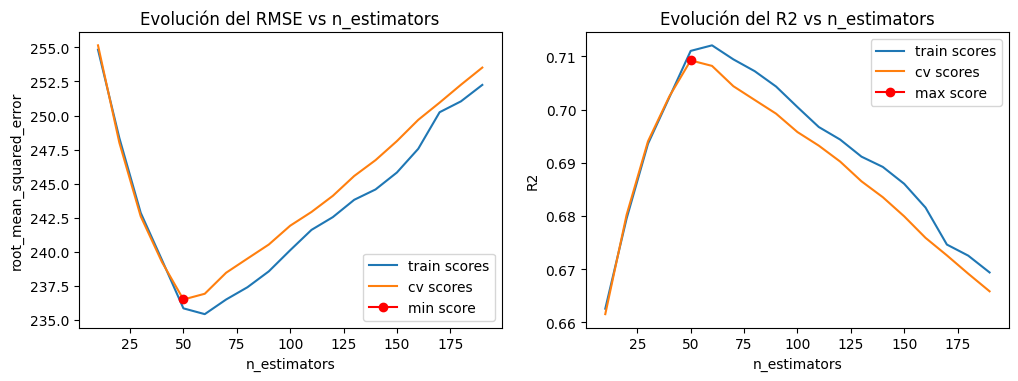

In [ ]:
# Gráfico con la evolución de los errores

fig, ax  = plt.subplots(1,2,figsize=(2*6, 3.84))
ax[0].plot(listado, train_scores_rmse, label="train scores")
ax[0].plot(listado, cv_scores_rmse, label="cv scores")
ax[0].plot(listado[np.argmin(cv_scores_rmse)], min(cv_scores_rmse),marker='o', color = "red", label="min score")
ax[0].set_ylabel("root_mean_squared_error")
ax[0].set_xlabel(hiperparametro)
ax[0].set_title("Evolución del RMSE vs "+hiperparametro)
ax[0].legend()

ax[1].plot(listado, train_scores_r2, label="train scores")
ax[1].plot(listado, cv_scores_r2, label="cv scores")
ax[1].plot(listado[np.argmax(cv_scores_r2)], max(cv_scores_r2),marker='o', color = "red", label="max score")
ax[1].set_ylabel("R2")
ax[1].set_xlabel(hiperparametro)
ax[1].set_title("Evolución del R2 vs "+hiperparametro)
ax[1].legend()

print('Mejor valor de '+hiperparametro)
print(f"{listado[np.argmin(cv_scores_rmse)]}")

Se observa un desempeño relativamente adecuado con 50 estimadores

### Cross-validation

In [ ]:
from sklearn.model_selection import cross_validate
# Se crea un modelo SVR con los mejores hiperparámetros
best_abr = AdaBoostRegressor(random_state=0
                                     ,learning_rate=0.2
                                     ,n_estimators=50
                                     ,loss='exponential'

                                     )

# Se definen los Pliegues (Folks)
CV = 10


# Definición de metricas a evaluar el modelo
scoring = {
    'r2':'r2',
    'neg_mean_squared_error(MSE)': 'neg_mean_squared_error',
    'root_mean_squared_error(RMSE)': 'neg_root_mean_squared_error',
    'mean_absolute_error(MAE)': 'neg_mean_absolute_error',
    'neg_mean_absolute_percentage_error(MAPE)': 'neg_mean_absolute_percentage_error'
    }


#Se se ejecuta una validación cruzada utilizando las métricas definidas anteriormente
scores = cross_validate(best_abr, X_Min_Max, y,cv=CV, scoring= scoring,n_jobs=-1)

In [ ]:
pd.DataFrame(scores).mean()

fit_time                                            12.006607
score_time                                           0.036609
test_r2                                              0.668059
test_neg_mean_squared_error(MSE)                -63731.234274
test_root_mean_squared_error(RMSE)                -245.309178
test_mean_absolute_error(MAE)                     -194.645875
test_neg_mean_absolute_percentage_error(MAPE)       -1.188685
dtype: float64

# Random Forest Regressor

In [ ]:
%%time
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(max_depth=7
                            ,n_estimators=200
                            , random_state=0)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(y_test, y_pred))

<timed exec>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


CPU times: total: 36 s
Wall time: 36.2 s


176.32039190792403

### Afinamiento de parámetros

#### max_depth

In [ ]:
%%time
# Validación empleando k-cross-validation y neg_root_mean_squared_error
# ==============================================================================
from sklearn.model_selection import cross_val_score
train_scores_rmse = []
train_scores_r2 = []
cv_scores_rmse    = []
cv_scores_r2    = []

# Valores evaluados
listado = range(1,10,1)
hiperparametro = 'max_depth'

# Bucle para entrenar un modelo con cada valor de n_estimators y extraer su error
# de entrenamiento y de k-cross-validation.
for elemento in listado:

    modelo = RandomForestRegressor(
                # n_estimators = elemento
                max_depth = elemento
                # ,learning_rate = 0.1
                # ,loss = 'exponential'
                # learning_rate = 0.6,
                ,random_state = 123
             )


    # Error de train
    modelo.fit(X_train, y_train.reshape(-1))
    predicciones = modelo.predict(X = X_train)
    rmse_train_score = mean_squared_error(
            y_true  = y_train.reshape(-1),
            y_pred  = predicciones,
            squared = False
           )
    r2_train_score = r2_score(
            y_true  = y_train.reshape(-1),
            y_pred  = predicciones
           )
    train_scores_rmse.append(rmse_train_score)
    train_scores_r2.append(r2_train_score)

    # Error de validación cruzada
    scores = cross_validate(
                estimator = modelo,
                X         = X_train,
                y         = y_train.reshape(-1),
                scoring   = ['neg_root_mean_squared_error','r2']
                # ,
                ,cv        = 5
                ,n_jobs=-1
                ,verbose=4
             )
    # Se agregan los scores de cross_val_score() y se pasa a positivo
    cv_scores_rmse.append(-1*scores['test_neg_root_mean_squared_error'].mean())
    cv_scores_r2.append(scores['test_r2'].mean())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.3s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    5.5s remaining:    8.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    8.2s remaining:   12.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    8.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   10.8s remaining:   16.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   10.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_

CPU times: total: 1min 57s
Wall time: 4min 6s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   25.5s remaining:   38.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   25.5s finished


Mejor valor de max_depth
9


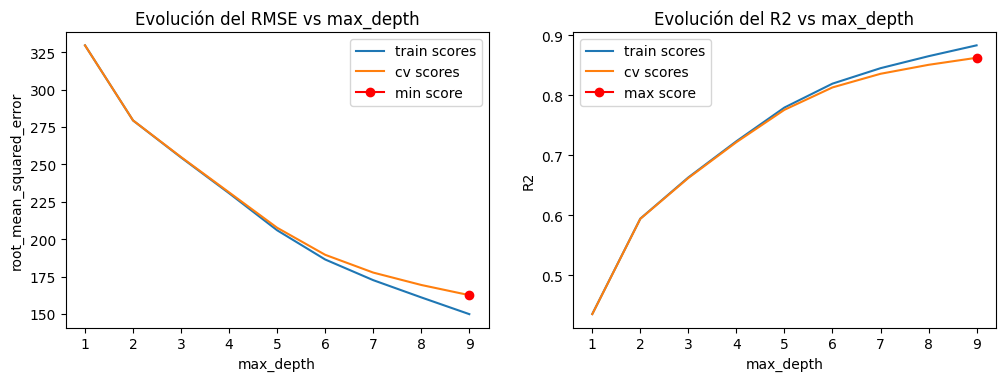

In [ ]:
# Gráfico con la evolución de los errores

fig, ax  = plt.subplots(1,2,figsize=(2*6, 3.84))
ax[0].plot(listado, train_scores_rmse, label="train scores")
ax[0].plot(listado, cv_scores_rmse, label="cv scores")
ax[0].plot(listado[np.argmin(cv_scores_rmse)], min(cv_scores_rmse),marker='o', color = "red", label="min score")
ax[0].set_ylabel("root_mean_squared_error")
ax[0].set_xlabel(hiperparametro)
ax[0].set_title("Evolución del RMSE vs "+hiperparametro)
ax[0].legend()

ax[1].plot(listado, train_scores_r2, label="train scores")
ax[1].plot(listado, cv_scores_r2, label="cv scores")
ax[1].plot(listado[np.argmax(cv_scores_r2)], max(cv_scores_r2),marker='o', color = "red", label="max score")
ax[1].set_ylabel("R2")
ax[1].set_xlabel(hiperparametro)
ax[1].set_title("Evolución del R2 vs "+hiperparametro)
ax[1].legend()

print('Mejor valor de '+hiperparametro)
print(f"{listado[np.argmin(cv_scores_rmse)]}")

Se opta por una profundidad de 7

#### n_estimators

In [ ]:
%%time
# Validación empleando k-cross-validation y neg_root_mean_squared_error
# ==============================================================================
from sklearn.model_selection import cross_val_score
train_scores_rmse = []
train_scores_r2 = []
cv_scores_rmse    = []
cv_scores_r2    = []

# Valores evaluados
listado = range(40,200,20)
hiperparametro = 'n_estimators'

# Bucle para entrenar un modelo con cada valor de n_estimators y extraer su error
# de entrenamiento y de k-cross-validation.
for elemento in listado:

    modelo = RandomForestRegressor(
                n_estimators = elemento
                ,max_depth = 7
                # ,learning_rate = 0.1
                # ,loss = 'exponential'
                # learning_rate = 0.6,
                ,random_state = 123
             )


    # Error de train
    modelo.fit(X_train, y_train.reshape(-1))
    predicciones = modelo.predict(X = X_train)
    rmse_train_score = mean_squared_error(
            y_true  = y_train.reshape(-1),
            y_pred  = predicciones,
            squared = False
           )
    r2_train_score = r2_score(
            y_true  = y_train.reshape(-1),
            y_pred  = predicciones
           )
    train_scores_rmse.append(rmse_train_score)
    train_scores_r2.append(r2_train_score)

    # Error de validación cruzada
    scores = cross_validate(
                estimator = modelo,
                X         = X_train,
                y         = y_train.reshape(-1),
                scoring   = ['neg_root_mean_squared_error','r2']
                # ,
                ,cv        = 5
                ,n_jobs=-1
                ,verbose=4
             )
    # Se agregan los scores de cross_val_score() y se pasa a positivo
    cv_scores_rmse.append(-1*scores['test_neg_root_mean_squared_error'].mean())
    cv_scores_r2.append(scores['test_r2'].mean())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    7.8s remaining:   11.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   11.4s remaining:   17.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   12.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   15.1s remaining:   22.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   15.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   19.4s remaining:   29.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   19.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_

CPU times: total: 2min 40s
Wall time: 5min 36s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   36.2s remaining:   54.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   36.4s finished


Mejor valor de n_estimators
180


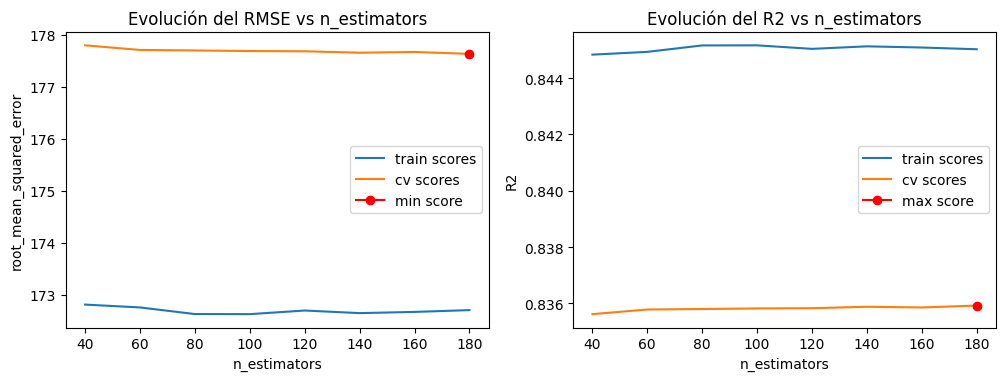

In [ ]:
# Gráfico con la evolución de los errores

fig, ax  = plt.subplots(1,2,figsize=(2*6, 3.84))
ax[0].plot(listado, train_scores_rmse, label="train scores")
ax[0].plot(listado, cv_scores_rmse, label="cv scores")
ax[0].plot(listado[np.argmin(cv_scores_rmse)], min(cv_scores_rmse),marker='o', color = "red", label="min score")
ax[0].set_ylabel("root_mean_squared_error")
ax[0].set_xlabel(hiperparametro)
ax[0].set_title("Evolución del RMSE vs "+hiperparametro)
ax[0].legend()

ax[1].plot(listado, train_scores_r2, label="train scores")
ax[1].plot(listado, cv_scores_r2, label="cv scores")
ax[1].plot(listado[np.argmax(cv_scores_r2)], max(cv_scores_r2),marker='o', color = "red", label="max score")
ax[1].set_ylabel("R2")
ax[1].set_xlabel(hiperparametro)
ax[1].set_title("Evolución del R2 vs "+hiperparametro)
ax[1].legend()

print('Mejor valor de '+hiperparametro)
print(f"{listado[np.argmin(cv_scores_rmse)]}")